In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from pylab import rcParams
import pandas as pd
from sklearn.cluster import KMeans


# Dataset
DF_RAW = pd.read_csv(
    "Wholesale customers data.csv",
    parse_dates=[1]
)


In [2]:
# Prepare dataset to use.
display(DF_RAW.head())
display(DF_RAW.shape)

print(
    f'Missing values check:\n{DF_RAW.isnull().sum()}\n'
)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)

Missing values check:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64



In [3]:
channel_values = DF_RAW['Channel'].value_counts()
region_values = DF_RAW['Region'].value_counts()

print(f'Channel labels:\n{channel_values}\n')
print(f'Region labels:\n{region_values}')

Channel labels:
1    298
2    142
Name: Channel, dtype: int64

Region labels:
3    316
1     77
2     47
Name: Region, dtype: int64


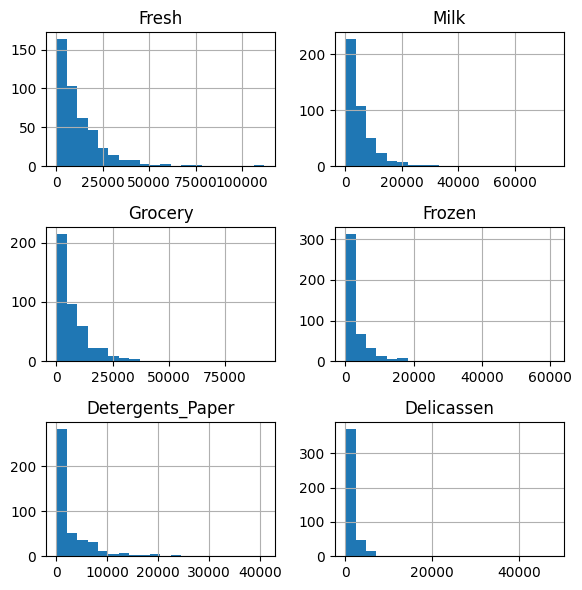

In [4]:
df_basic = DF_RAW.drop(
    ['Channel', 'Region'],
    axis=1
)

# Items histogram display to be analyzed.
rcParams['figure.figsize'] = (6, 6)
df_basic.hist(bins=20)
plt.tight_layout()
plt.show()

In [5]:
# Clustering
CLUSTERS: int = 4

model = KMeans(
    n_clusters=CLUSTERS,
    n_init=10,
    random_state=0
)
y_pred = model.fit_predict(df_basic)

print(y_pred[:14])

[3 1 3 3 0 3 3 3 3 1 1 3 0 1]


In [6]:
# Average per group
df_clustered = df_basic.groupby(
    y_pred
).mean()

display(df_clustered)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,36144.482759,5471.465517,6128.793103,6298.655172,1064.000000,2316.724138
1,4808.842105,10525.010526,16909.789474,1462.589474,7302.400000,1650.884211
2,19888.272727,36142.363636,45517.454545,6328.909091,21417.090909,8414.000000
3,9087.463768,3027.427536,3753.514493,2817.985507,1003.003623,1040.525362


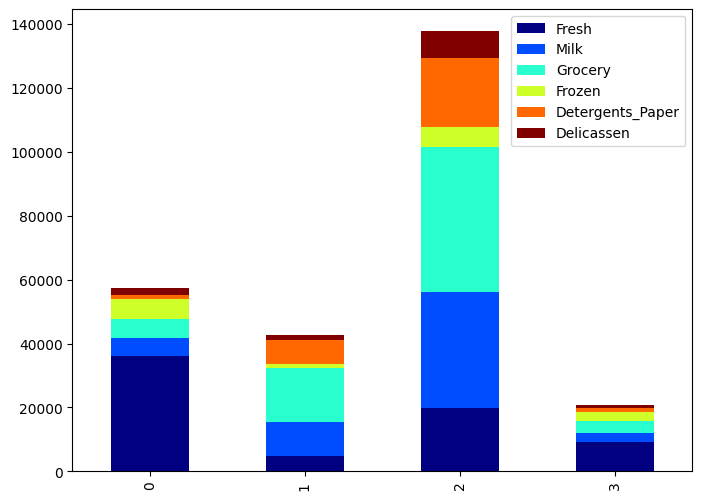

In [7]:
# Displayed in bar graph by group
df_clustered.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    colormap='jet'
)
plt.show()